In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3

'%.3f'

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [6]:
X, _ = make_blobs(random_state=10)

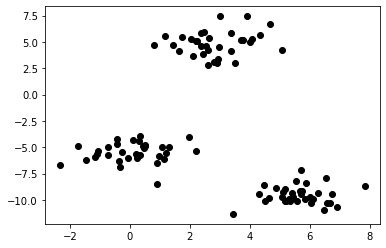

In [4]:
plt.scatter(X[:,0],X[:,1],color = 'black')

In [7]:
kmeans = KMeans(init='random', n_clusters=3)
kmeans.fit(X)

KMeans(init='random', n_clusters=3)

In [10]:
y_pred = kmeans.predict(X)

In [19]:
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)
merge_data.columns = ['feature1', 'feature2', 'cluster']
print(merge_data)

    feature1   feature2  cluster
0  -2.324963  -6.699996        2
1   0.518568  -4.900868        2
2   2.443018   3.846526        0
3   5.826623  -9.922593        1
4   2.033002   5.289908        0
..       ...        ...      ...
95 -0.736931  -4.957402        2
96  2.790440   3.068621        0
97  4.486980 -10.074298        1
98  6.268638  -9.381380        1
99  5.400508  -9.295867        1

[100 rows x 3 columns]


In [21]:
ax = None

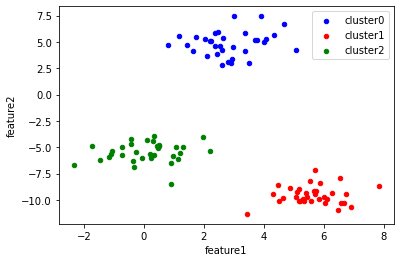

In [16]:
colors  = ['blue', 'red', 'green']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i], label=f'cluster{i}', ax=ax)

In [22]:
import requests, zipfile
import io
# 銀行データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'
r = requests.get(url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [24]:
bank = pd.read_csv('bank-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
bank_sub = bank[['age', 'balance', 'campaign', 'previous']]

In [28]:
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


In [30]:
kmeans = KMeans(init='random', n_clusters=6, random_state=0)
kmeans.fit(bank_sub_std)
labels = pd.Series(kmeans.labels_, name='cluster_number')

In [31]:
print(labels.value_counts(sort=False))

0    24509
1      221
2     2684
3     1380
4    14734
5     1683
Name: cluster_number, dtype: int64


0        4
1        4
2        0
3        4
4        0
        ..
45206    4
45207    4
45208    4
45209    4
45210    3
Name: cluster_number, Length: 45211, dtype: int32


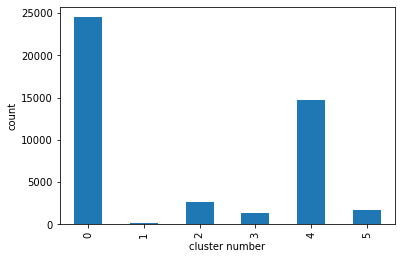

In [41]:
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')
print(labels)

In [34]:
dist_list=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(X)
    dist_list.append(kmeans.inertia_)

Text(0, 0.5, 'Distortion')

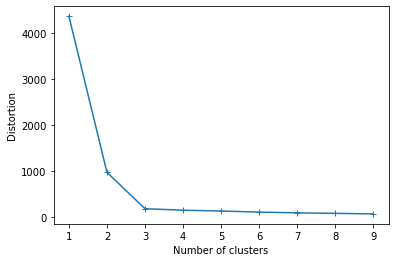

In [36]:
plt.plot(range(1,10), dist_list, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

In [37]:
dist_list=[]
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(bank_sub_std)
    dist_list.append(kmeans.inertia_)

Text(0, 0.5, 'Distortion')

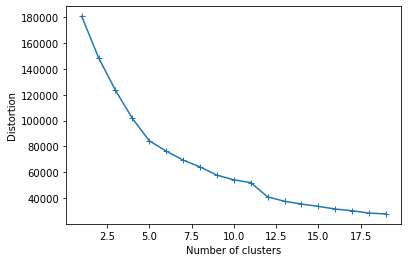

In [38]:
plt.plot(range(1,20), dist_list, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

In [40]:
bank_with_cluster = pd.concat([bank, labels], axis=1)
bank_with_cluster.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_number
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,4
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [43]:
bins = [15,20,25,30,35,40,45,50,55,60,65,100]

qcut_age=pd.cut(bank_with_cluster.age, bins, right=False)

df = pd.concat([bank_with_cluster.cluster_number, qcut_age], axis=1)

In [44]:
cross_cluster_age= df.groupby(['cluster_number', 'age']).size().unstack().fillna(0)
cross_cluster_age

age,"[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 100)"
cluster_number,,,,,,,,,,,
0,45,711,4024,8492,7146,4091,0,0,0,0,0
1,0,3,10,37,25,26,27,30,38,11,14
2,0,14,152,497,517,460,375,306,263,63,37
3,0,20,132,327,308,187,146,117,71,38,34
4,0,0,0,0,0,1155,4701,3885,3436,838,719
5,2,14,146,387,353,266,221,150,114,24,6


<AxesSubplot:xlabel='age', ylabel='cluster_number'>

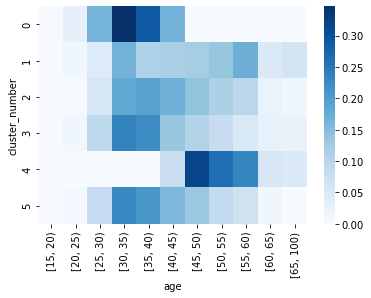

In [45]:
sns.heatmap(cross_cluster_age.apply(lambda x : x/x.sum(), axis=1), cmap='Blues')

In [46]:
cross_cluster_job = bank_with_cluster.groupby(['cluster_number', 'job']).size().unstack().fillna(0)
cross_cluster_job

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
cluster_number,,,,,,,,,,,,
0,3097,5610,728,426,5130,57,852,2564,813,4459,698,75
1,15,12,19,7,91,24,11,9,3,21,6,3
2,219,459,91,70,788,111,130,189,48,460,99,20
3,196,244,42,22,332,53,41,112,52,250,31,5
4,1467,3040,543,675,2732,1984,479,1124,4,2084,439,163
5,177,367,64,40,385,35,66,156,18,323,30,22


<AxesSubplot:xlabel='job', ylabel='cluster_number'>

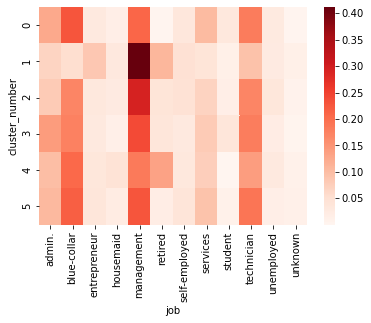

In [48]:
sns.heatmap(cross_cluster_job.apply(lambda x : x/x.sum(), axis=1), cmap='Reds')

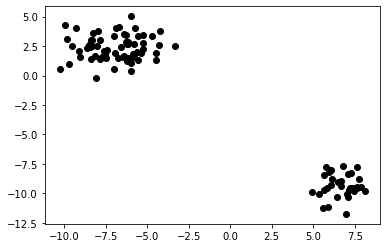

In [49]:
X, _ = make_blobs(random_state=52)
plt.scatter(X[:,0],X[:,1],color = 'black')

In [62]:
dist_list=[]
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(X)
    dist_list.append(kmeans.inertia_)

Text(0, 0.5, 'Distortion')

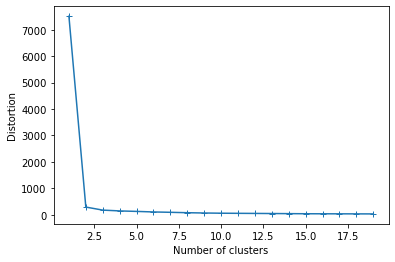

In [63]:
plt.plot(range(1,20), dist_list, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

In [64]:
kmeans = KMeans(init='random', n_clusters=2)
kmeans.fit(X)

KMeans(init='random', n_clusters=2)

In [65]:
y_pred = kmeans.predict(X)

In [69]:
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)
merge_data.columns = ['feature1', 'feature2', 'cluster']
print(merge_data)

    feature1   feature2  cluster
0  -8.350019   3.023515        1
1   6.777017  -7.711702        0
2  -6.177799   1.469626        1
3   6.653409  -9.368984        0
4  -8.091372  -0.196486        1
..       ...        ...      ...
95  7.022843 -10.020457        0
96 -6.272827   3.409140        1
97  5.633655  -8.457190        0
98 -9.128872   2.111245        1
99 -5.976556   1.475684        1

[100 rows x 3 columns]


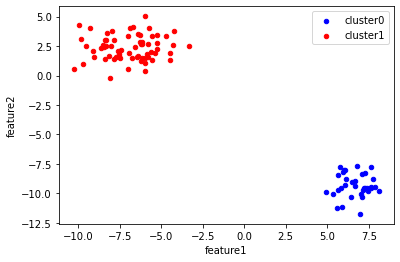

In [70]:
ax = None
colors  = ['blue', 'red']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i], label=f'cluster{i}', ax=ax)

相関係数0.889:


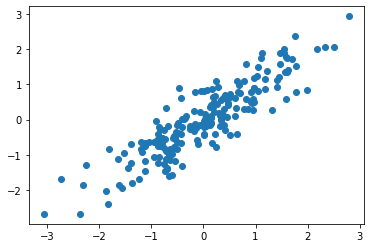

In [72]:
from sklearn.preprocessing import StandardScaler
# RandomStateオブジェクトを作成
sample = np.random.RandomState(1)
#2つの乱数を生成
X = np.dot (sample.rand (2, 2), sample.randn(2, 200)).T
#標準化
sc = StandardScaler()
X_std = sc.fit_transform(X)
# 相関係数の算出とグラフ化
print('相関係数{:.3f}:'.format(sp.stats.pearsonr(X_std[:, 0], X_std[:, 1])[0]))
plt.scatter (X_std[:, 0], X_std[:, 1])

In [73]:
# インポート
from sklearn.decomposition import PCA

# 主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)

PCA(n_components=2)

In [76]:
print(pca.components_)
print(pca.explained_variance_)

[[-0.707 -0.707]
 [-0.707  0.707]]
[1.899 0.111]


In [77]:
print(pca.explained_variance_ratio_)

[0.945 0.055]


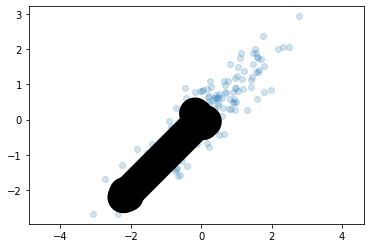

In [85]:
# パラメータ設定
arrowprops=dict(arrowstyle=' ->',
            linewidth=32,
            shrinkA=0, shrinkB=0)
# 矢印を描くための関数
def draw_vector(v0, v1):
    plt.gca().annotate('', v1, v0, arrowprops=arrowprops)
# 元のデータをプロット
plt.scatter(X_std[:, 0], X_std [ : , 1], alpha=0.2)
# 主成分分析の2軸を矢印で表示する
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

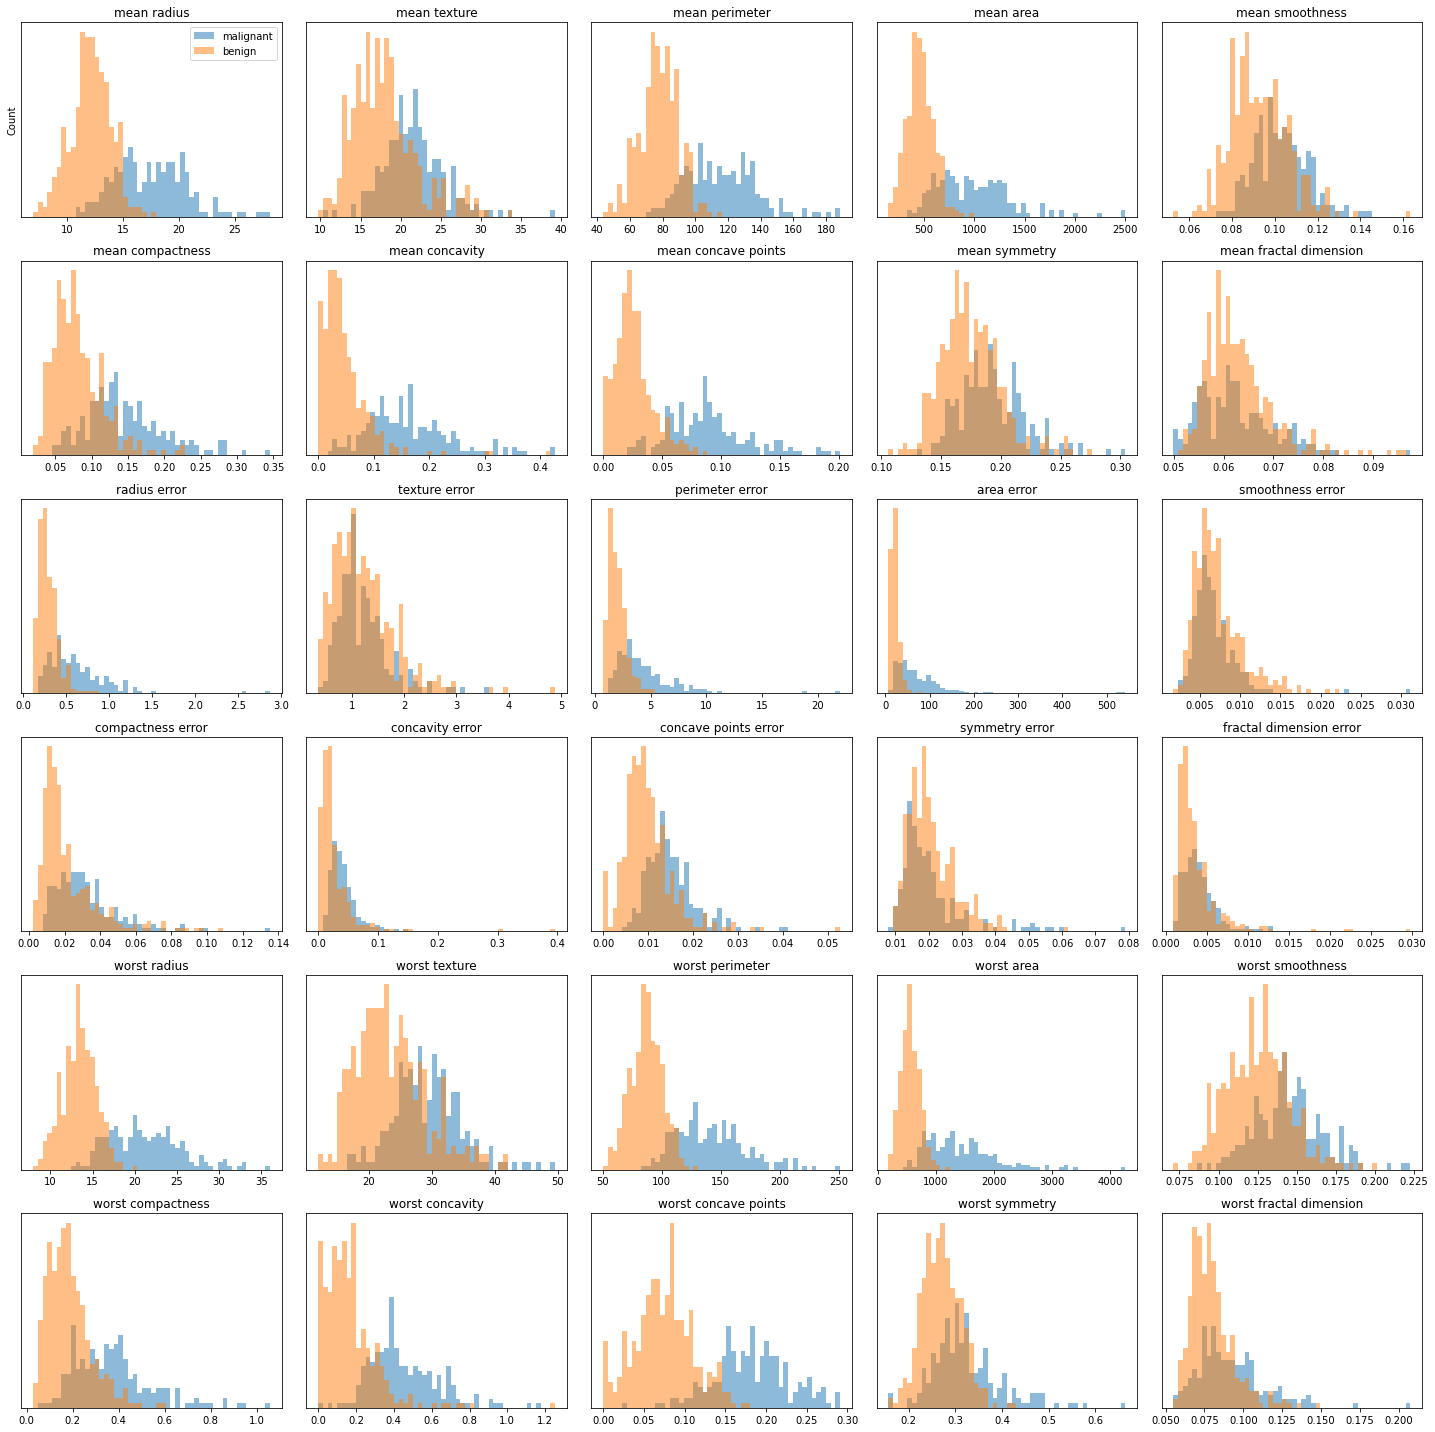

In [89]:
# 乳がんデータを読み込むためのインポート
from sklearn.datasets import load_breast_cancer
# 乳がんデータの取得 
cancer = load_breast_cancer()

# データをmalignant(悪性)か benign (良性)に分けるためのフィルター処理 
# malignant(悪性)はcancer.targetが0 
malignant = cancer.data[cancer.target==0]
# benign(良性)はcancer.target が0 
benign = cancer.data[cancer.target==1]

# malignant(悪性)がブルー、benign(良性)がオレンジのヒストグラム 1 
# 各図は、各々の説明変数(mean radiusなど)と目的変数との関係を示したヒストグラム
fig, axes = plt.subplots (6,5, figsize=(20,20)) 
ax = axes.ravel() 
for i in range (30):
    _,bins = np.histogram(cancer.data[:,i], bins=50) 
    ax[i].hist (malignant [:,i], bins, alpha=.5) 
    ax[i].hist (benign[:,i], bins, alpha=.5) 
    ax[i].set_title(cancer.feature_names[i]) 
    ax[i].set_yticks(())
# ラベルの設定 
ax[0].set_ylabel ('Count') 
ax[0].legend (['malignant','benign'], loc='best') 
fig.tight_layout()

In [92]:
# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)

# 主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

# 表示
print(X_pca.shape)
print(pca.explained_variance_ratio_)

(569, 2)
[0.443 0.19 ]


In [94]:
# 列にラベルをつける、１つ目が第一主成分、２つ目が第二主成分
X_pca = pd.DataFrame(X_pca, columns=['pc1', 'pc2'])

# 上のデータに、目的変数（cancer.target)を紐付ける、横に結合
X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns=['target'])], axis=1)

# 悪性、良性を分ける
pca_malignant = X_pca[X_pca['target']== 0]
pca_benign = X_pca[X_pca['target']==1]

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

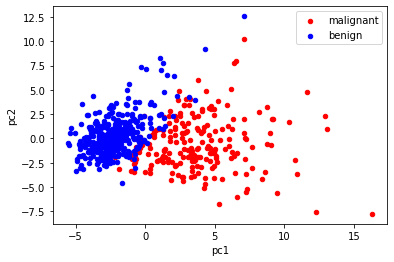

In [96]:
# 悪性をプロット
ax = pca_malignant.plot.scatter(x='pc1', y='pc2', color='red', label='malignant');

# 良性をプロット
pca_benign.plot.scatter(x='pc1', y='pc2', color='blue', label='benign', ax=ax)